<a href="https://colab.research.google.com/github/mohamed32145/MindCare/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#now we want to know which patient converted from MCI to AD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metaDAta = pd.read_csv('ADNI1_Complete_3Yr_1.5T.csv')
dff = pd.read_csv('Cohort_2_BLCHANGE_10May2025.csv')

#we want just the patient from the ADNI1 project
change =dff[dff.PHASE=='ADNI1']
print(F" there are about {len(change.RID.unique())} registered patient in the \n Cohort_2_BLCHANGE_10May2025.csv dataset and we want the 60 patient that we have their MRI images ")
SubjectsId = metaDAta.Subject.unique()

# now we got this patients who has a mri images
change = change[change.PTID.isin(SubjectsId)]


change.head()


 there are about 819 registered patient in the 
 Cohort_2_BLCHANGE_10May2025.csv dataset and we want the 60 patient that we have their MRI images 


,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,BCPREDX,BCADAS,BCMMSE,BCMMSREC,...,BCCORADL,BCCORCOG,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,002_S_0295,295,bl,bl,2006-05-10,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,406,101,2006-05-10,NaN,NaN,NaN,NaN,2006-05-10 00:00:00.0
1,ADNI1,002_S_0295,295,m06,m06,2006-11-08,1.0,0.0,0.0,0.0,...,0.0,0.0,1388,101,2006-11-10,NaN,NaN,NaN,NaN,2006-11-10 00:00:00.0
2,ADNI1,002_S_0295,295,m12,m12,2007-05-25,1.0,0.0,0.0,0.0,...,0.0,0.0,2958,101,2007-05-29,NaN,NaN,NaN,NaN,2007-05-29 00:00:00.0
3,ADNI1,002_S_0295,295,m24,m24,2008-08-04,1.0,0.0,0.0,0.0,...,-1.0,-1.0,5756,101,2008-09-05,NaN,NaN,NaN,NaN,2008-09-05 00:00:00.0
4,ADNI1,002_S_0295,295,m36,m36,2009-05-26,1.0,0.0,0.0,0.0,...,-1.0,-1.0,6686,101,2009-05-26,NaN,NaN,NaN,NaN,2009-05-26 00:00:00.0


In [12]:
#EDA on metaDAta

print("\n metaDAta Summary:")
print(metaDAta.info())
print("\n Missing Values in metaDAta:")
print(metaDAta.isnull().sum())

print("\n Basic Statistics for metaDAta:")
print(metaDAta.describe(include='all'))

print("\n Unique patients in metaDAta:", metaDAta['Subject'].nunique())
print(" Unique visits:", metaDAta['Visit'].unique())






 metaDAta Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  2182 non-null   object 
 1   Subject        2182 non-null   object 
 2   Group          2182 non-null   object 
 3   Sex            2182 non-null   object 
 4   Age            2182 non-null   int64  
 5   Visit          2182 non-null   object 
 6   Modality       2182 non-null   object 
 7   Description    2182 non-null   object 
 8   Type           2182 non-null   object 
 9   Acq Date       2182 non-null   object 
 10  Format         2182 non-null   object 
 11  Downloaded     0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 204.7+ KB
None

 Missing Values in metaDAta:
Image Data ID       0
Subject             0
Group               0
Sex                 0
Age                 0
Visit               0
Modality            0
Des

In [14]:
#  EDA on change

print("\n change Summary:")
print(change.info())
print("\n Missing Values in change:")
print(change.isnull().sum())

print("\n Basic Statistics for change:")
print(change.describe(include='all'))



print("\n Unique patients in change:", change['RID'].nunique())
print(" Number of unique VISCODEs (timepoints):", change['VISCODE'].nunique())





 change Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 0 to 5174
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 2049 non-null   object 
 1   PTID                  2049 non-null   object 
 2   RID                   2049 non-null   int64  
 3   VISCODE               2049 non-null   object 
 4   VISCODE2              2049 non-null   object 
 5   EXAMDATE              2049 non-null   object 
 6   BCPREDX               2049 non-null   float64
 7   BCADAS                2049 non-null   float64
 8   BCMMSE                2049 non-null   float64
 9   BCMMSREC              2049 non-null   float64
 10  BCNMMMS               2049 non-null   float64
 11  BCNEUPSY              2049 non-null   float64
 12  BCNONMEM              2049 non-null   float64
 13  BCFAQ                 2049 non-null   float64
 14  BCCDR                 2049 non-null   float64
 15  BCDEPRES

In [2]:
# which ones of them converted from mci to ad
changed_bcpredx = change.groupby('RID')['BCPREDX'].nunique()
subjects_with_change = changed_bcpredx[changed_bcpredx > 1].index
subjects_with_change

subjects_with_3 = change[(change['RID'].isin(subjects_with_change)) & (change['BCPREDX'] == 3) ]['RID'].unique()

convertedToAd= [1070,572, 30, 331,388,604,625,835,1066 ,507, 649,195,429 ]
print(f"just 13 patients were founed {convertedToAd} that converted from mci to ad \nin the 3T 3Y dataset, we move to work with the 1.5T 3Y dataset")


just 13 patients were founed [1070, 572, 30, 331, 388, 604, 625, 835, 1066, 507, 649, 195, 429] that converted from mci to ad 
in the 3T 3Y dataset, we move to work with the 1.5T 3Y dataset


In [11]:
# this file include the subjects who converted from MCI to AD in the 1.5T data set
dff = pd.read_csv('Cohort_2_BLCHANGE_10May2025.csv')
df= pd.read_csv('adni_prediction_progressiveMCI_12month.csv')

print(df.head())
#filrting just the ADNI1 project
adni1_df = df[df['Visit'].astype(str).str.contains('ADNI1', na=False)]
#1.5T metdata
df= pd.read_csv('ADNI1_Complete_3Yr_1.5T.csv')
#the patients we have an mri for them
convertedNumber =len(df[df['Subject'].isin(adni1_df['Subject ID'])]['Subject'].unique())
print(f"there are {convertedNumber} patients who converted from mci to ad and we have mri image for them of the 1.5T dataset with this id's")
convertedIDs = df[df['Subject'].isin(adni1_df['Subject ID'])]['Subject'].unique()
print(convertedIDs)
print("convertedIDs subjects were moved to pMCI folder and the remian to sMCI folder")








   Subject ID Sex               Visit  Study Date   Age  \
0  002_S_0729   F    ADNI1/GO Month 6  2007-02-22  65.9   
1  002_S_0954   F    ADNI1/GO Month 6  2007-05-03  70.0   
2  002_S_1070   M   ADNI1/GO Month 12  2007-12-10  74.8   
3  002_S_4171   M  ADNI2 Year 1 Visit  2012-08-24  70.5   
4  002_S_4521   M  ADNI2 Year 1 Visit  2013-03-15  71.2   

                                   Description  Imaging Protocol  Image ID  \
0  MPR; GradWarp; B1 Correction; N3 <- MP-RAGE               NaN     64740   
1  MPR; GradWarp; B1 Correction; N3 <- MP-RAGE               NaN     62365   
2  MPR; GradWarp; B1 Correction; N3 <- MP-RAGE               NaN     86299   
3                           MT1; N3m <- MPRAGE               NaN    337465   
4                           MT1; N3m <- MPRAGE               NaN    364636   

  Tissue  Months since baseline Exam Diagnosis  Days diff  
0    All               7.228074            MCI        0.0  
1    All               6.735251            MCI        0.

In [ ]:
"""

we also looked on the metdata of the 1.5 T 2 years program , we found that about
23 that converted from MCI to AD but most of them were alos partcobated in the
3 years study



"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
metaDAta = pd.read_csv('ADNI1_Complete_2Yr_1.5T_5_13_2025.csv')
dff = pd.read_csv('Cohort_2_BLCHANGE_10May2025.csv')
#we want just the patient from the ADNI1 project
change =dff[dff.PHASE=='ADNI1']
print(F" there are about {len(change.RID.unique())} registered patient in the \n Cohort_2_BLCHANGE_10May2025.csv dataset and we want the 60 patient that we have their MRI images ")
SubjectsId = metaDAta.Subject.unique()
# now we got this patients who has a mri images
change = change[change.PTID.isin(SubjectsId)]
# which ones of them converted from mci to ad

changed_bcpredx = change.groupby('RID')['BCPREDX'].nunique()
subjects_with_change = changed_bcpredx[changed_bcpredx > 1].index
subjects_with_change

subjects_with_3 = change[(change['RID'].isin(subjects_with_change)) & (change['BCPREDX'] == 3) ]['RID'].unique()
print(subjects_with_3)

dff[dff['PTID'].isin(subjects_with_3)].head()

change[change['RID']==978 ]





#

 there are about 819 registered patient in the 
 Cohort_2_BLCHANGE_10May2025.csv dataset and we want the 60 patient that we have their MRI images 
[ 222  856  240  325 1028   57  750 1126 1247 1213 1387  294  568  978
  725 1054  941   77   50  390  638  727  873]
convertedIDs subjects were moved to pMCI folder and the remian to sMCI folder


,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,BCPREDX,BCADAS,BCMMSE,BCMMSREC,...,BCCORADL,BCCORCOG,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
2020,ADNI1,032_S_0978,978,bl,bl,2006-11-02,-4.0,-4.0,-4.0,-4.0,...,-4.0,-4.0,1330,16,2006-11-02,NaN,NaN,NaN,NaN,2006-11-02 00:00:00.0
2021,ADNI1,032_S_0978,978,m06,m06,2007-05-09,2.0,0.0,1.0,0.0,...,0.0,0.0,2796,16,2007-05-09,NaN,NaN,NaN,NaN,2007-05-09 00:00:00.0
2022,ADNI1,032_S_0978,978,m12,m12,2007-12-05,2.0,0.0,0.0,0.0,...,-1.0,-1.0,4292,16,2007-12-05,NaN,NaN,NaN,NaN,2007-12-05 00:00:00.0
2023,ADNI1,032_S_0978,978,m18,m18,2008-05-07,2.0,1.0,0.0,0.0,...,-1.0,1.0,5214,16,2008-05-07,NaN,NaN,NaN,NaN,2008-05-07 00:00:00.0
2024,ADNI1,032_S_0978,978,m24,m24,2008-12-23,2.0,0.0,1.0,0.0,...,1.0,1.0,6158,16,2008-12-23,NaN,NaN,NaN,NaN,2008-12-23 00:00:00.0
2025,ADNI1,032_S_0978,978,m36,m36,2009-10-28,3.0,1.0,0.0,0.0,...,1.0,1.0,7020,16,2009-10-28,NaN,NaN,NaN,NaN,2009-10-28 00:00:00.0


<ipython-input-11-aea90a936940>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Group', palette=custom_palette)


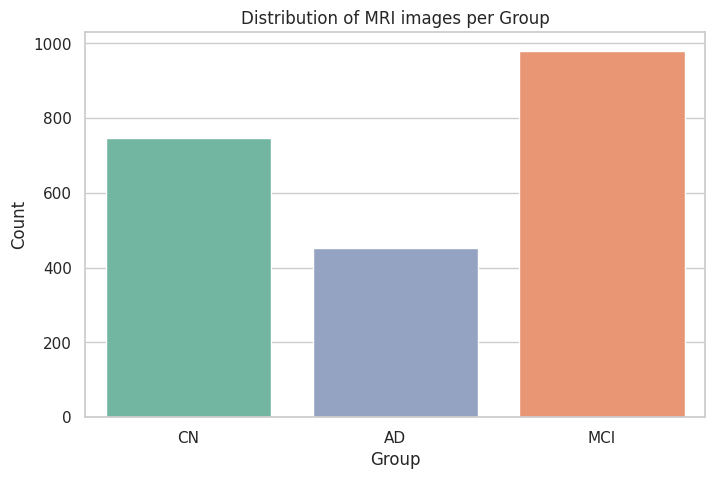

<ipython-input-11-aea90a936940>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unique_subjects, x='Group', palette=custom_palette)


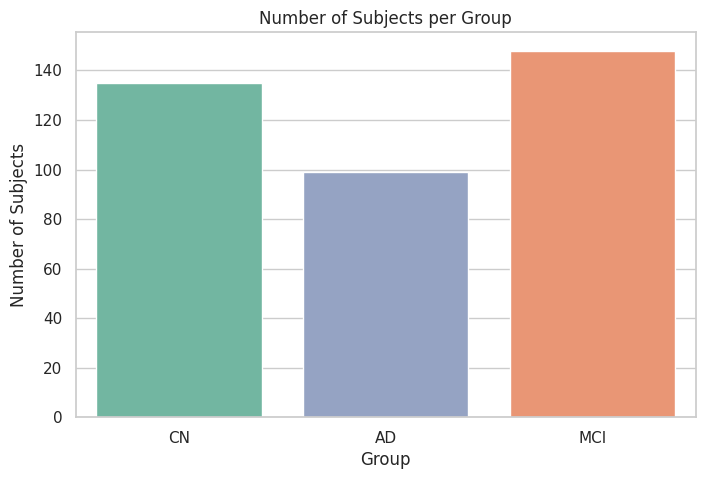

array([ 729, 1070, 1224, 1130,   41,  101,  128,  249,  293,  326,  362,
        861, 1282,  563,  658,  702, 1121, 1326,  141, 1351, 1394,   42,
        126,  217,  331,  388,  604,  887,  179,  835,  878, 1073,  214,
        513,  906,  922,  204,  997,  869,  539,  566,  314, 1010, 1425,
        952,  507,  839, 1007, 1217, 1299,  667,  649,  752,  834, 1271,
       1315,  108,  708,  865,  394, 1389,  429,  973])

In [ ]:
df= pd.read_csv('ADNI1_Complete_3Yr_1.5T.csv')

unique_subjects = df.drop_duplicates(subset='Subject')

# Set seaborn style
sns.set(style="whitegrid")

custom_palette = {"CN": "#66c2a5", "MCI": "#fc8d62", "AD": "#8da0cb"}

#  Distribution of MRI images per Group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Group', palette=custom_palette)
plt.title('Distribution of MRI images per Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

#  Distribution of Subjects per Group
plt.figure(figsize=(8, 5))
sns.countplot(data=unique_subjects, x='Group', palette=custom_palette)
plt.title('Number of Subjects per Group')
plt.xlabel('Group')
plt.ylabel('Number of Subjects')
plt.show()
df[df['Subject'].isin(adni1_df['Subject ID'])]
dff[dff.PTID.isin(df[df['Subject'].isin(adni1_df['Subject ID'])]['Subject'].unique())].RID.unique()

<ipython-input-12-f01b59dcf2ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visit_counts.index, y=visit_counts.values, palette='viridis')


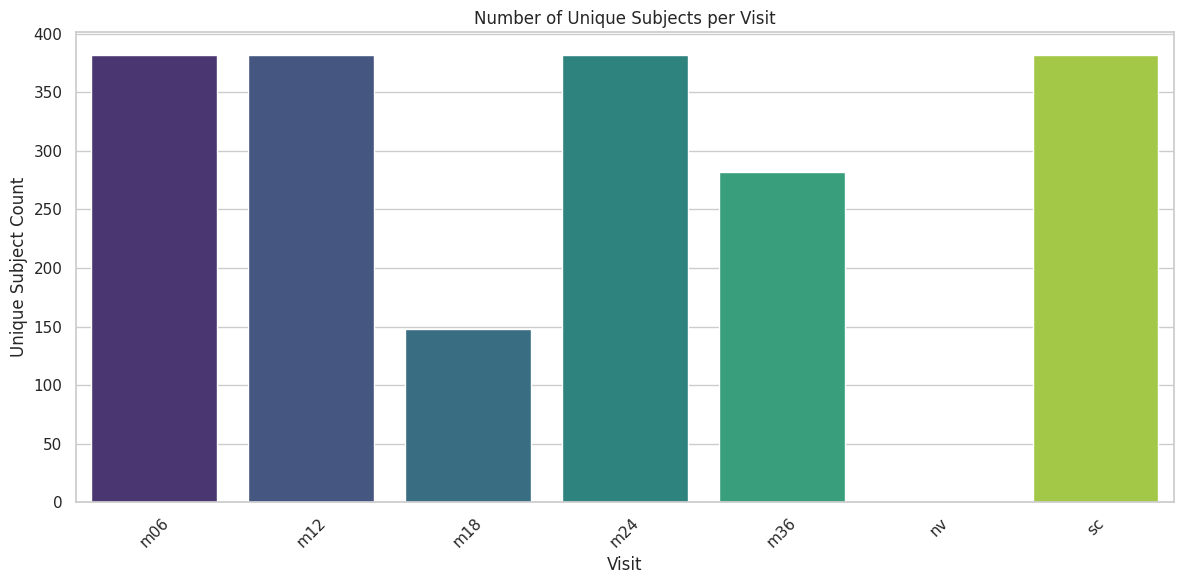

In [ ]:
visit_counts = df.groupby('Visit')['Subject'].nunique().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=visit_counts.index, y=visit_counts.values, palette='viridis')

plt.title('Number of Unique Subjects per Visit')
plt.xlabel('Visit')
plt.ylabel('Unique Subject Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

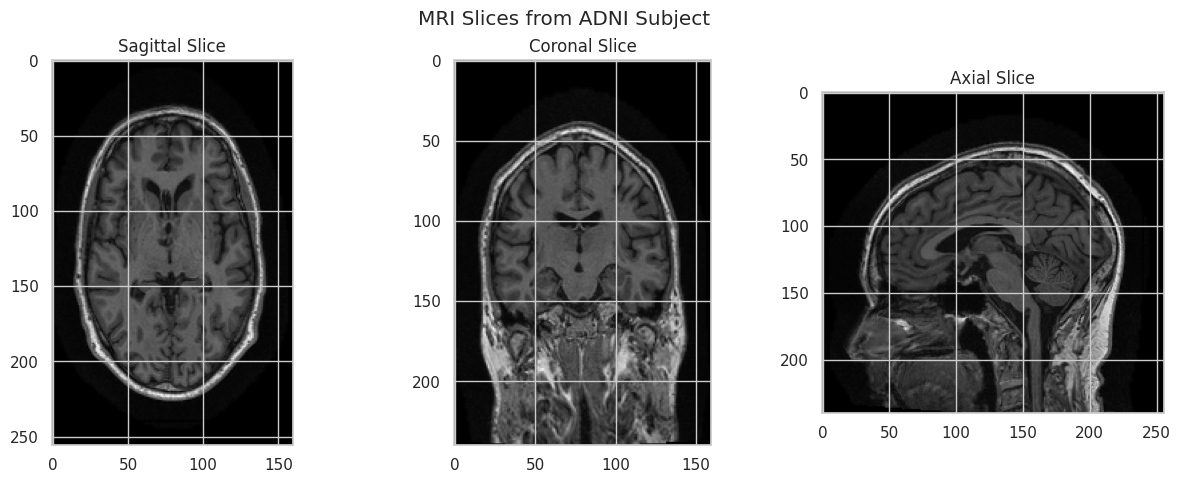

In [ ]:
                                                                          # mri viewing

import nibabel as nib
import matplotlib.pyplot as plt

# Load a NIfTI image
img_path = r"image.nii"
img = nib.load(img_path)
img_data = img.get_fdata()
# Plot middle slice in all 3 dimensions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_data[img_data.shape[0]//2, :, :], cmap='gray')
plt.title('Sagittal Slice')

plt.subplot(1, 3, 2)
plt.imshow(img_data[:, img_data.shape[1]//2, :], cmap='gray')
plt.title('Coronal Slice')

plt.subplot(1, 3, 3)
plt.imshow(img_data[:, :, img_data.shape[2]//2], cmap='gray')
plt.title('Axial Slice')

plt.suptitle('MRI Slices from ADNI Subject')
plt.show()